In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv(r"C:\Users\Redmi\Downloads\experiment_lesson_4.csv")

In [4]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


* Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
* Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

Построим распределение времени доставки для контрольной и тестовой групп

In [5]:
# Разделение выборки на две группы по признаку 'experiment_group'
group_control = df[df['experiment_group'] == 'control']
group_test = df[df['experiment_group'] == 'test']

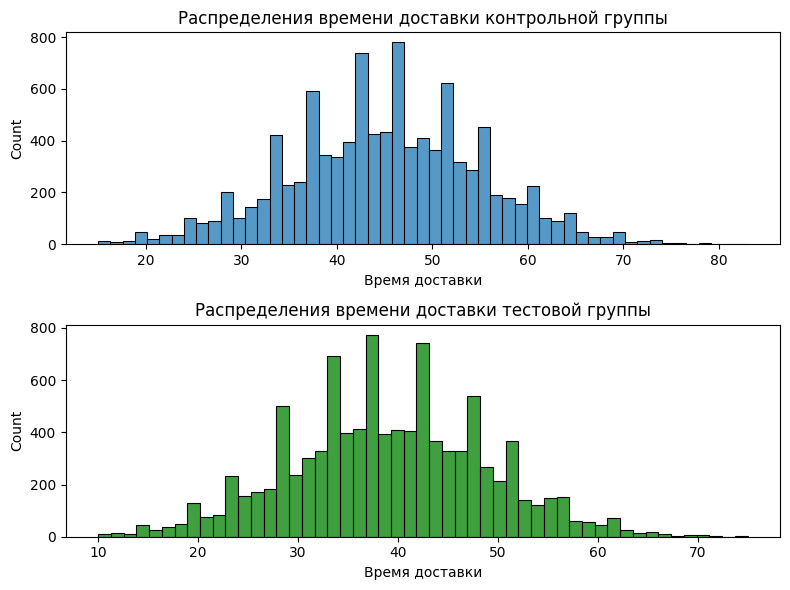

In [6]:
# Создание фигуры и двух подграфиков
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Построение первого графика с использованием seaborn
sns.histplot(x='delivery_time', data=group_control, ax=ax1)
ax1.set_title('Распределения времени доставки контрольной группы')
ax1.set_xlabel('Время доставки')

# Построение второго графика с использованием seaborn
sns.histplot(x='delivery_time', data=group_test, ax=ax2, color='green')
ax2.set_title('Распределения времени доставки тестовой группы')
ax2.set_xlabel('Время доставки')

# Настройка расстояния между подграфиками
plt.tight_layout(pad=1.08)

# Отображение графиков
plt.show()

На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [7]:
group_sizes = df.groupby('experiment_group').size()
print(group_sizes)


experiment_group
control    10092
test       10104
dtype: int64


Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

In [8]:
from scipy.stats import normaltest 

stat_control, p_value_control = normaltest(group_control['delivery_time'], nan_policy='omit')

print(f"Statistic: {stat_control}")
print(f"p-value: {p_value_control}")

Statistic: 0.25349755437872584
p-value: 0.8809549607809654


In [9]:
stat_test, p_value_test = normaltest(group_test['delivery_time'], nan_policy='omit')

print(f"Statistic: {stat_test}")
print(f"p-value: {p_value_test}")

Statistic: 7.024157092641915
p-value: 0.02983483685333173


In [10]:
import pingouin as pg

In [11]:
pg.normality(group_control['delivery_time'], method='normaltest')

,W,pval,normal
delivery_time,0.253498,0.880955,True


In [12]:
pg.normality(group_test['delivery_time'], method='normaltest')

,W,pval,normal
delivery_time,7.024157,0.029835,False


In [13]:
grouped = df.groupby('experiment_group')['delivery_time']

# Вычисление среднего значения и стандартного отклонения для каждой группы
mean_values = grouped.mean()
std_values = grouped.std()

In [14]:
mean_values

experiment_group
control    45.065101
test       39.046813
Name: delivery_time, dtype: float64

In [15]:
std_values

experiment_group
control    9.990017
test       9.883308
Name: delivery_time, dtype: float64

In [16]:
stats.ttest_ind(group_control['delivery_time'], group_test['delivery_time']).pvalue

0.0

In [18]:
group_test['delivery_time']

10092    38.0
10093    31.0
10094    39.0
10095    29.0
10096    31.0
         ... 
20191    42.0
20192    32.0
20193    23.0
20194    41.0
20195    41.0
Name: delivery_time, Length: 10104, dtype: float64

In [ ]:
Нулевая гипотеза о том, что разницы между средним временем доставки в тестовой и контрольной группе нет,

По результатам анализа, показания времени доставки по тестовой группе оказались выше, чем в контрольной группе.
